## Quiz 2 by Joshua Krachman

Starting now with Problem 1..

We have: $ \sum\limits_{i=1}^n (Y_i - \beta_1 X_{i1} - \beta_2 X_{i2}-...-\beta_p X_{ip})^2 $

We split up the sum: $ \sum\limits_{i \in G_1} (Y_i - \beta_1)^2 + \sum\limits_{i \in G_2}(Y_i - \beta_2)^2  + ...+ \sum\limits_{i \epsilon G_k}(Y_i - \beta_p)^2 $

Generalizing the p parentheses terms, minimizing:
$ \sum\limits_{k =1}^p \sum\limits_{i \in G_k} (Y_i - \beta_k)^2 $ 

using: $ \frac{d}{dk}(\sum\limits_{k=1}^p \sum\limits_{i \in G_k} (Y_i - \beta_k)^2) = 0$

Evalutating: $ \sum\limits_{k=1}^p 2 \sum\limits_{i \in G_k} (Y_i - \beta_k)= 0$

Because each individual sum will be minimized, minimizing the overall equation, we can divide both sides by 2 and elimitate the sum over p elements term:


$ = \sum\limits_{i \in G_k}(Y_i - \beta_k) = \sum\limits_{i \in G_k}(Y_i)- \beta_k n_k =0$, where $n_k$ = amount in group k

$ Rearranging: (\frac{1}{n_k}) \sum\limits_{i \in G_k} Y_i = \beta_k$

Therefore:

$ \bar Y^{(k)} = \beta_k $


Y-intercept = -694.180922147847
Slope = 1.0675677731655153
In-Sample Error Rate =  832740.3005383221


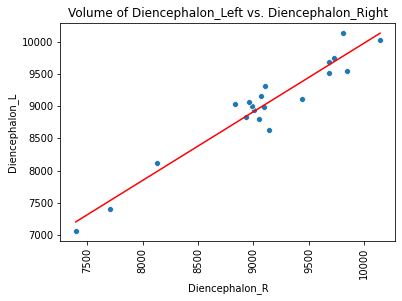

In [4]:
# Exercise 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

df=pd.read_csv('https://raw.githubusercontent.com/jkrachm2/Data-Science/master/Master%20Repo/ds4bme_intro-master/data/kirby21.csv')
t1=df.loc[(df.type==1) & (df.level==1)]
t1l1pivot = t1.pivot(index = 'id', columns = 'roi', values = 'volume')
sns.scatterplot(x = 'Diencephalon_R', y = 'Diencephalon_L', data = t1l1pivot)
plt.xticks(rotation = 90)
right=t1[(t1.roi=='Diencephalon_R')]['volume']
left=t1[(t1.roi=='Diencephalon_L')]['volume']
(beta1,beta0)=(st.linregress(x = right, y = left))[0:2]

print("Y-intercept =", beta0)
print("Slope =", beta1)

x = np.linspace(np.amin(right),np.amax(right),100000)
y = np.multiply(beta1,x)+ beta0
plt.plot(x, y, '-r', label='y')
plt.title('Volume of Diencephalon_Left vs. Diencephalon_Right')

summation=0
for (valL,valR) in zip(left,right):
    summation= summation + (valL-beta0-beta1*valR)**2

print('In-Sample Error Rate = ',summation)
   

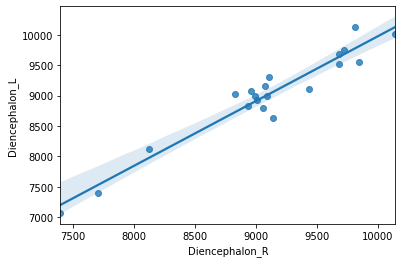

In [5]:
# comparing with regplot...

ax1=sns.regplot(x = 'Diencephalon_R', y = 'Diencephalon_L', data = t1l1pivot)

#Problem 3

There are a ton of data analytics that go into baseball, specifically when it comes to positioning fielders to stand where batters usually hit the ball. I'm going to use the locations of where hit balls ended up and classify as either a hit or an out. 